In [1]:
from fast import *
#from sympy import factorial, sqrt, binomial, cos, sin, pi, exp, I, zeros
#from sympy import simplify
from sympy import pi, eye, I, zeros
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
init_printing()

In [3]:
half = 1/Integer(2)
alpha, beta, gamma = symbols("alpha, beta, gamma", real=True)
alpha, beta, gamma

These matrices can be found in [1]

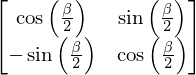

In [4]:
wigner_d_small(half, beta)

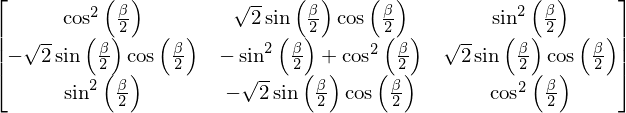

In [5]:
wigner_d_small(2*half, beta)

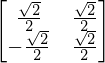

In [6]:
wigner_d_small(half, beta).subs({beta:pi/2})

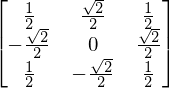

In [7]:
wigner_d_small(2*half, beta).subs({beta:pi/2})

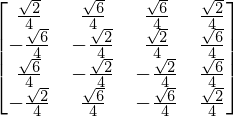

In [8]:
wigner_d_small(3*half, beta).subs({beta:pi/2})

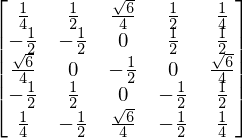

In [9]:
wigner_d_small(4*half, beta).subs({beta:pi/2})

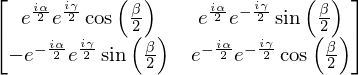

In [10]:
wigner_d(half, alpha, beta, gamma)

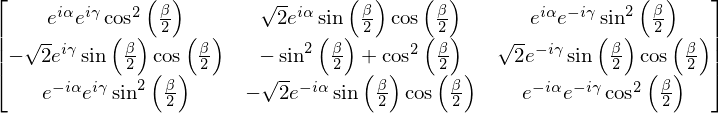

In [11]:
wigner_d(2*half, alpha, beta, gamma)

A very basic example of a density matrix rotation:

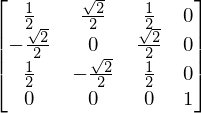

In [12]:
density_matrix_rotation([1, 0], 0, pi/2, 0)

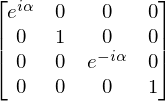

In [13]:
density_matrix_rotation([1, 0], alpha, 0, 0)

A rotation for density matrix of the $D_2$ line states of $^{87}\mathrm{Rb}$.

In [14]:
fine_states = [State("Rb", 87, 5, 0, half), State("Rb", 87, 5, 1, 3*half)]
hyperfine_states = make_list_of_states(fine_states, "hyperfine")
magnetic_states = make_list_of_states(fine_states, "magnetic")
F_values = [state.f for state in hyperfine_states]
F_values

In [15]:
Ne = len(magnetic_states)
Rotation = density_matrix_rotation(F_values, 0, pi/2, 0)
Rot = np.array([[float(Rotation[i, j]) for j in range(Ne)] for i in range(Ne)])

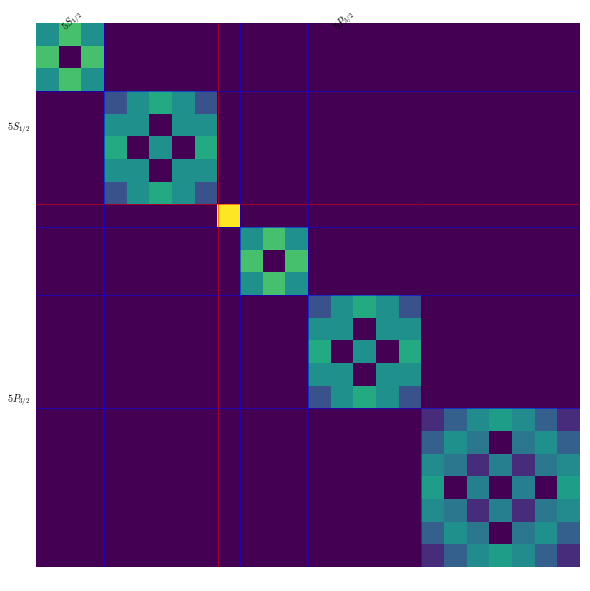

In [24]:
path="folder_11___Rotations/" 
fig=plt.figure(figsize=(10, 10)); ax=fig.add_subplot(111)
fancy_matrix_plot(ax, Rot, magnetic_states, path, 'd1_rotation_rb87.png',take_abs=True)

Let us build a pure density matrix (which can in principle be physically done in rubidium by saturating a sigma transition).

In [25]:
rho = zeros(Ne, Ne)
rho[7, 7] = half
rho[23, 23] = half
rho[23, 7] = -half
rho[7, 23] = -half

rhop = [[float(rho[i, j]) for j in range(Ne)] for i in range(Ne)]

In [26]:
rho.eigenvals()

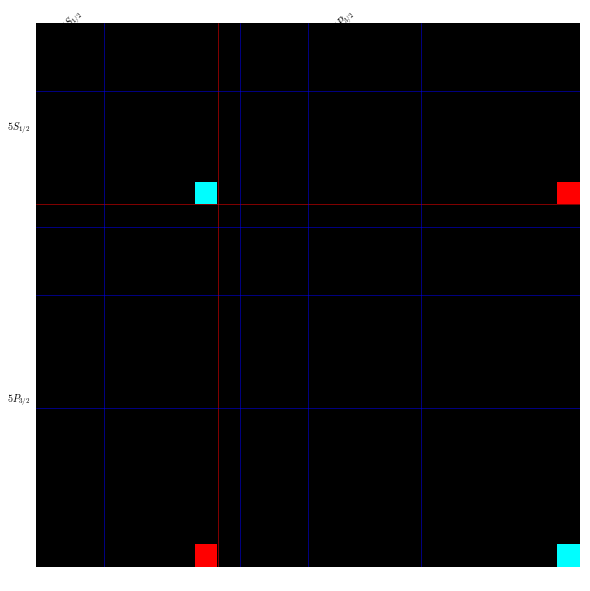

In [27]:
path="folder_11___Rotations/" 
fig=plt.figure(figsize=(10, 10)); ax=fig.add_subplot(111)

fancy_matrix_plot(ax, rhop, magnetic_states, path, 'rho0_rb87.png', complex_matrix=True)

And we now rotate this matrix.

In [28]:
rho2 = Rotation*rho*Rotation.adjoint()
rho2p = [[float(rho2[i, j]) for j in range(Ne)] for i in range(Ne)]

In [29]:
rho2.eigenvals()

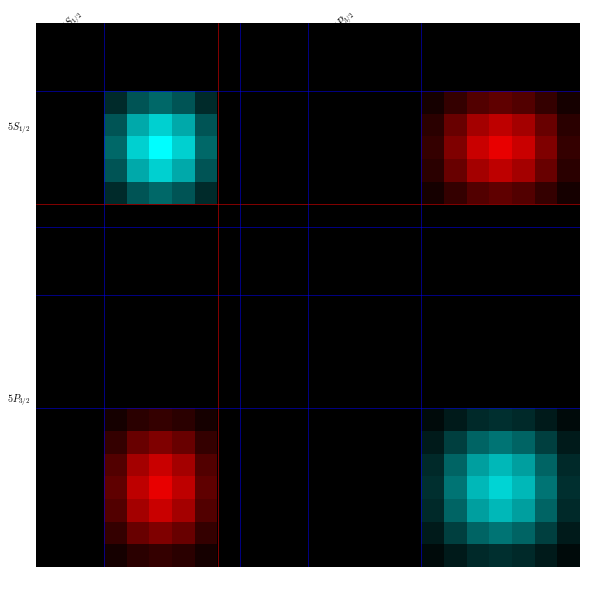

In [30]:
fig=plt.figure(figsize=(10, 10)); ax=fig.add_subplot(111)
fancy_matrix_plot(ax, rho2p, magnetic_states, path, 'rho2_rb87.png', complex_matrix=True)

[1] A. R. Edmonds. Angular momentum in quantum mechanics. Investigations in physics, 4.; Investigations in physics, no. 4. Princeton, N.J., Princeton University Press, 1957.